In [2]:
## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


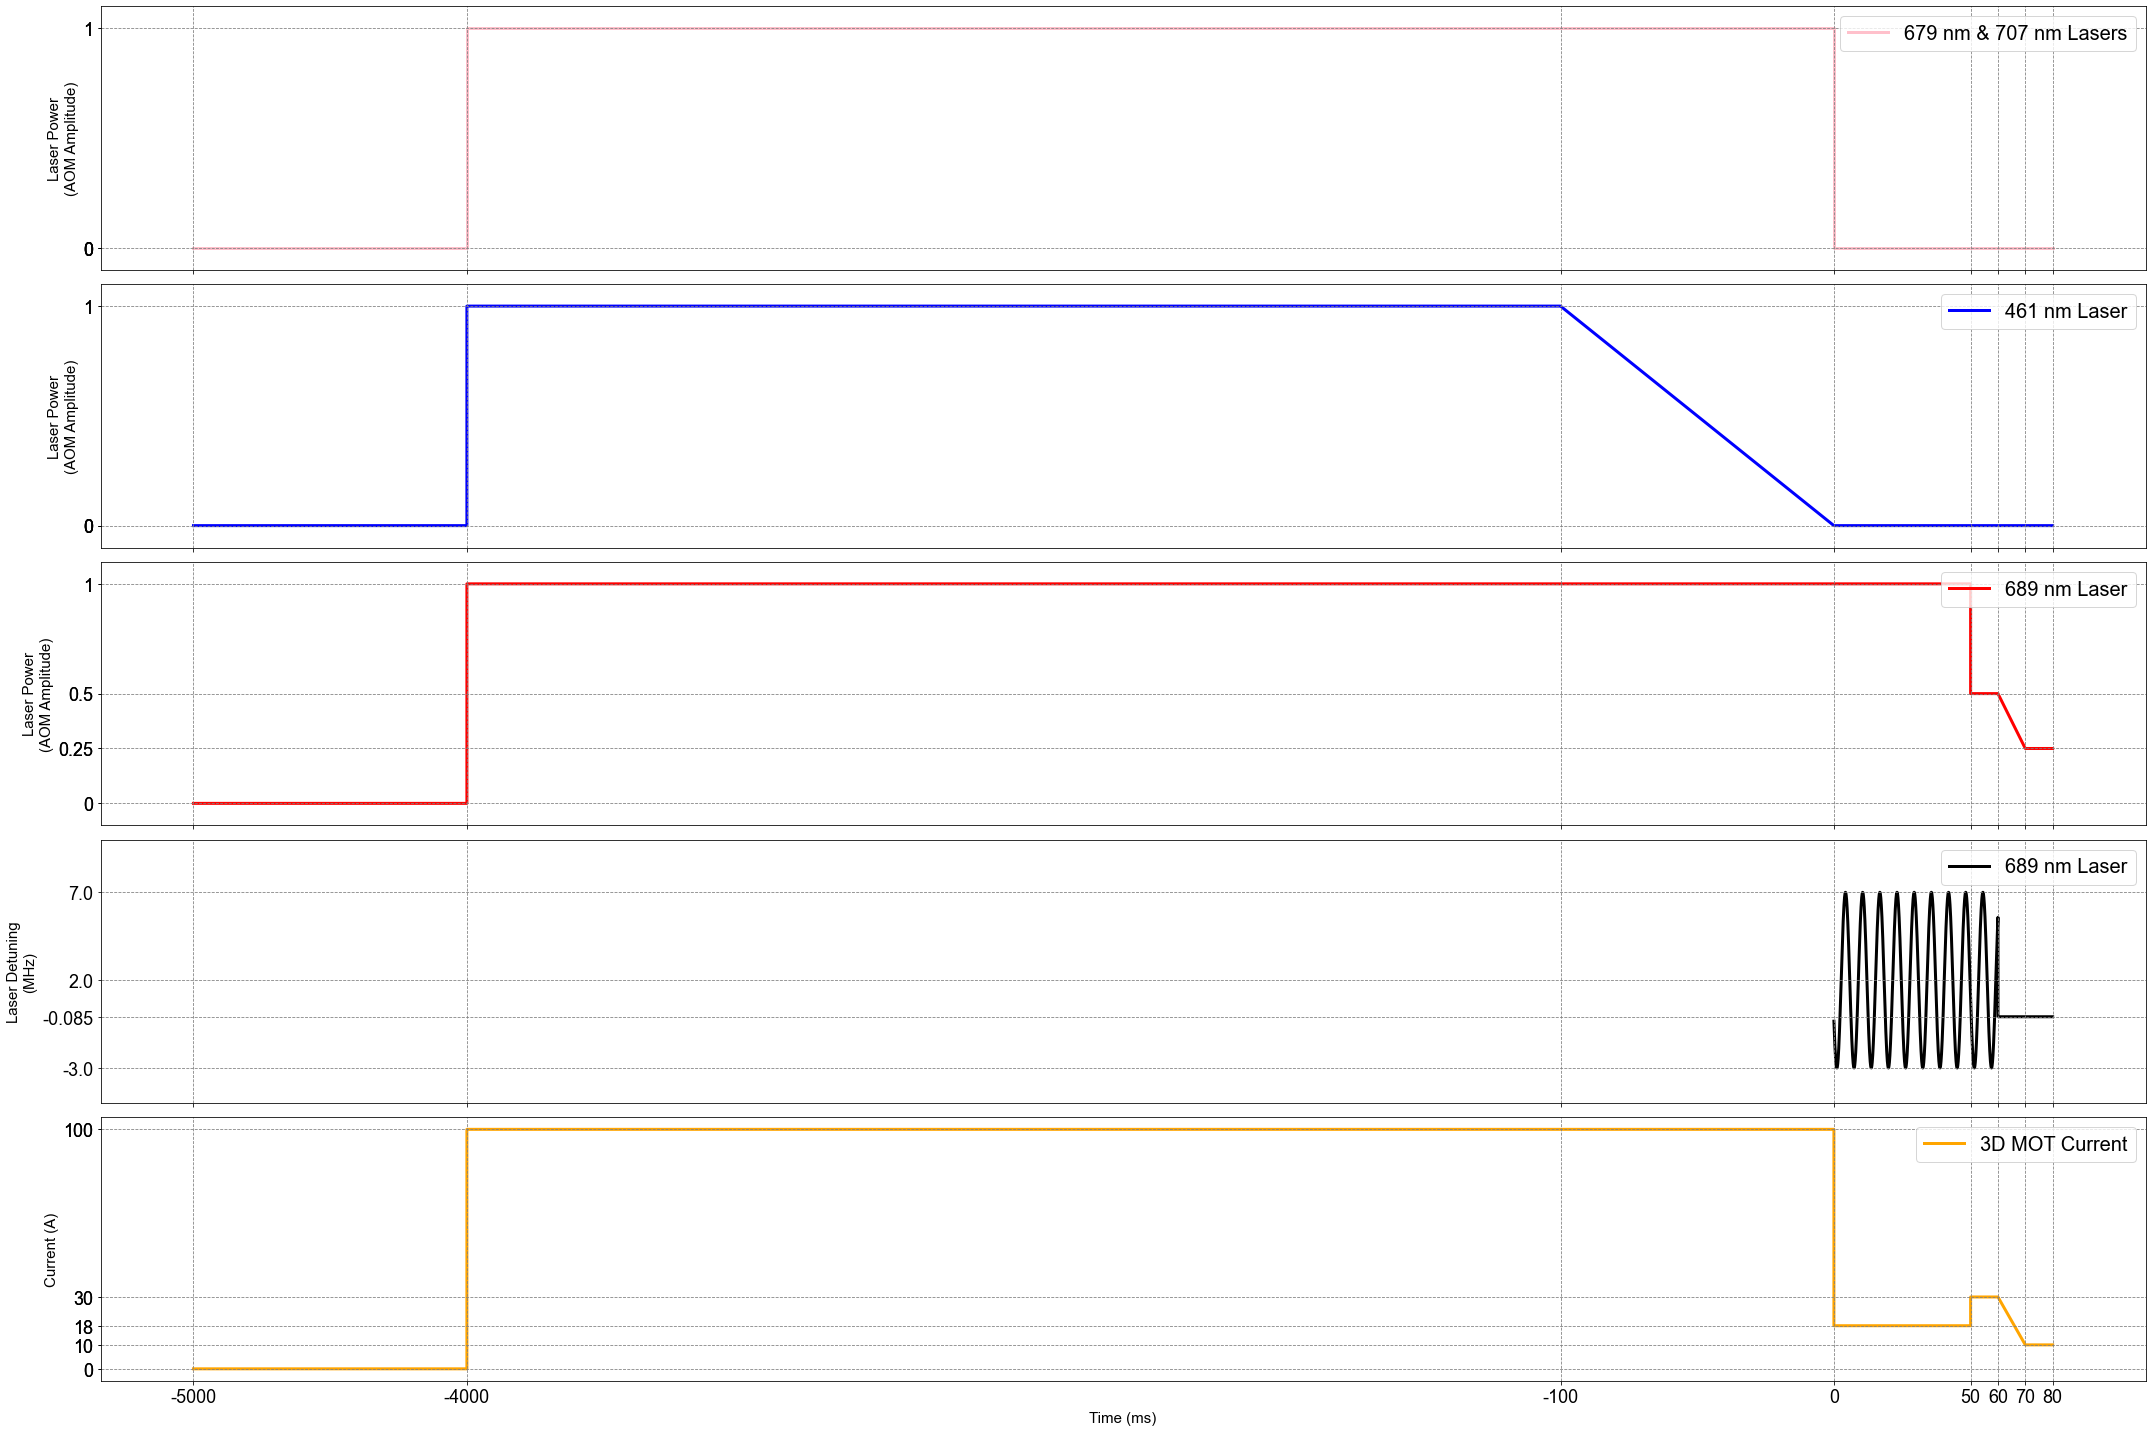

In [4]:
import matplotlib.pyplot as plt
import numpy as np

offset_time =500
# Time points for phases (in ms)
time_points = np.array([-100,0,0, 1600])-offset_time

# 679 nm & 707 nm Lasers
time_679_707 = np.array([-100,0,0, 500,500, 580])-offset_time
state_679_707 = [0,0,1, 1, 0, 0]

# 461 nm Laser
time_461 = np.array([-100,0,0, 400,500, 580])-offset_time
state_461 = [0,0,1,1,0,0]

# 689 nm Intensity
time_689 = np.array([-100,0,0,550, 550,560, 570, 580])-offset_time
intensity_689 = [0,0,1,1, 0.5, 0.5, 0.25, 0.25]  # Units are normalized to Io (mW/cm^2)

# 689 nm Laser Detuning, draw a sine function
time_689_bb = np.linspace(500, 560, 10000)
resonance = 347.4 # Resonance frequency in MHz
BB_center = 349.4 # Center frequency in MHz
nb_center = 347.315 # Center frequency in MHz
BB_width = 5    # Width in MHz
detuning_689_bb = BB_width*np.sin(time_689_bb) + (BB_center-resonance) # Frequency in MHz
time_689_single = [560, 580]
detuning_689_single = [nb_center-resonance, nb_center-resonance]
time_689_detuning = np.concatenate((time_689_bb, time_689_single))-offset_time
detuning_689 = np.concatenate((detuning_689_bb, detuning_689_single))
detuning_689_discrete = np.array([BB_center-resonance+BB_width,BB_center-resonance-BB_width,BB_center-resonance,np.round(nb_center-resonance,3)])

# MOT Current
time_current = np.array([-100,0,0, 500,500,550, 550, 560, 570, 580])-offset_time
current = [0,0,100, 100, 18,18,30 ,30, 10, 10]  # Current in Amps

# Plotting
fig, ax = plt.subplots(5, 1, figsize=(30, 20), sharex=True)

# 679 nm & 707 nm Lasers
ax[0].plot(time_679_707, state_679_707, color='pink', label='679 nm & 707 nm Lasers', linewidth=3)
ax[0].set_ylabel('Laser Power\n(AOM Amplitude)', fontsize=15)
ax[0].legend(loc='upper right', fontsize=20)
ax[0].set_yticks(state_679_707)
ax[0].set_yticklabels(state_679_707)
ax[0].set_ylim(-0.1, 1.1)

# 461 nm Laser
ax[1].plot(time_461, state_461, color='blue', label='461 nm Laser', linewidth=3)
ax[1].set_ylabel('Laser Power\n(AOM Amplitude)', fontsize=15)
ax[1].legend(loc='upper right', fontsize=20)
ax[1].set_yticks(state_461)
ax[1].set_yticklabels(state_461)
ax[1].set_ylim(-0.1, 1.1)

# 689 nm Intensity
ax[2].plot(time_689, intensity_689, color='red', label='689 nm Laser', linewidth=3)
ax[2].set_ylabel('Laser Power\n(AOM Amplitude)',fontsize=15)
ax[2].legend(loc='upper right', fontsize=20)
ax[2].set_yticks(intensity_689)
ax[2].set_yticklabels(intensity_689)
ax[2].set_ylim(-0.1, 1.1)

# 689 nm Laser Detuning
ax[3].plot(time_689_detuning, np.array(detuning_689), color='black', label='689 nm Laser', linewidth=3)
ax[3].set_ylabel('Laser Detuning\n(MHz)',fontsize=15)
ax[3].legend(loc='upper right', fontsize=20)
ax[3].set_yticks(detuning_689_discrete)
ax[3].set_yticklabels(detuning_689_discrete)
ax[3].set_ylim(-5,10)


# MOT Current
ax[4].plot(time_current, current,  color='orange', label='3D MOT Current', linewidth=3)
ax[4].set_ylabel('Current (A)',fontsize=15)
ax[4].set_xlabel('Time (ms)',fontsize=15)
ax[4].legend(loc='upper right', fontsize=20)
ax[4].set_yticks(current)
ax[4].set_yticklabels(current)  
all_time_points = np.unique(np.concatenate((time_679_707, time_461, time_689, time_current)))
ax[4].set_xticks(all_time_points)
all_time_points_label = np.delete(all_time_points, 1)
all_time_points_label = np.insert(all_time_points_label, 1, -4000)
all_time_points_label = np.delete(all_time_points_label, 0)
all_time_points_label = np.insert(all_time_points_label, 0, -5000)
ax[4].set_xticklabels([f'{int(t)}' for t in all_time_points_label])
# Plot vertical lines for each time point

# Plot horizontal lines for each y value
for y_value in np.unique(state_679_707):
    ax[0].axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)
for y_value in np.unique(state_461):
    ax[1].axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)
for y_value in np.unique(intensity_689):
    ax[2].axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)
for y_value in np.unique(detuning_689_discrete):
    ax[3].axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)
for y_value in np.unique(current):
    ax[4].axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)
for time_point in all_time_points:
    for axis in ax:
        axis.axvline(x=time_point, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()

plt.savefig('experimental_sequence.pdf',dpi=1200)

# plt.show()
